In [75]:

import rasterio
import matplotlib
import matplotlib.pyplot as pyplot
from matplotlib.colors import ListedColormap
from functional import seq
import numpy


Show raster

[(0.0, 0.0, 0.0, 1.0), (0.0, 0.0, 1.0, 1.0), (1.0, 0.0, 0.0, 1.0), (0.9372549019607843, 0.5098039215686274, 0.9372549019607843, 1.0), (1.0, 0.7490196078431373, 0.8, 1.0), (1.0, 0.0, 1.0, 1.0), (0.6274509803921569, 0.3176470588235294, 0.16862745098039217, 1.0), (0.8980392156862745, 0.8980392156862745, 0.8, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 0.38823529411764707, 0.0, 1.0), (0.0, 0.6980392156862745, 0.6980392156862745, 1.0), (0.9176470588235294, 0.8, 0.6470588235294118, 1.0), (0.6980392156862745, 0.6980392156862745, 0.0, 1.0), (1.0, 0.6470588235294118, 0.0, 1.0), (1.0, 1.0, 0.0, 1.0), (0.24705882352941178, 0.8784313725490196, 0.8196078431372549, 1.0), (0.4980392156862745, 1.0, 0.8274509803921568, 1.0), (1.0, 1.0, 1.0, 1.0)]


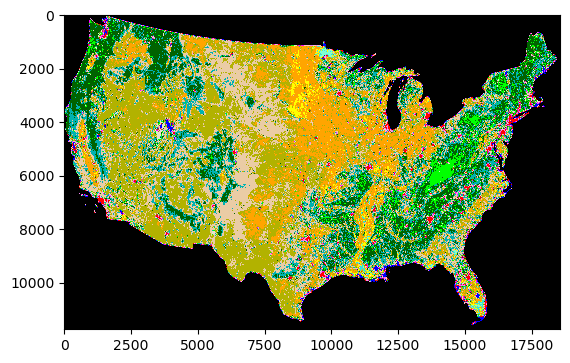

In [49]:
with rasterio.open("./data/CONUS_Landcover_B1/CONUS_B1_y2030.tif") as src:
  band1 = src.read(1) # as a numpy array
  
  # get the colormap for the band
  embedded_colormap: dict = src.colormap(1)  
  colors = seq(list(embedded_colormap.values())).map(lambda color: tuple(item / 255 for item in color)).list()
  colormap = ListedColormap(colors[0:18]) # do not include unused values or pyplot will not be able to plot the colors correctly
  
  # show nunmpy array as a raster image
  pyplot.imshow(band1, cmap=colormap)
  pyplot.show()

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 18563, 'height': 11747, 'count': 1, 'crs': CRS.from_epsg(5070), 'transform': Affine(250.0, 0.0, -2357953.1839,
       0.0, -250.0, 3175292.633)}


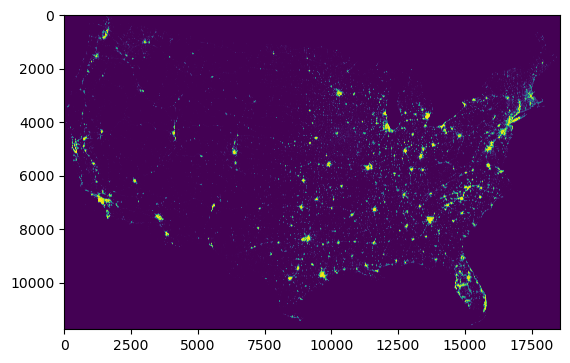

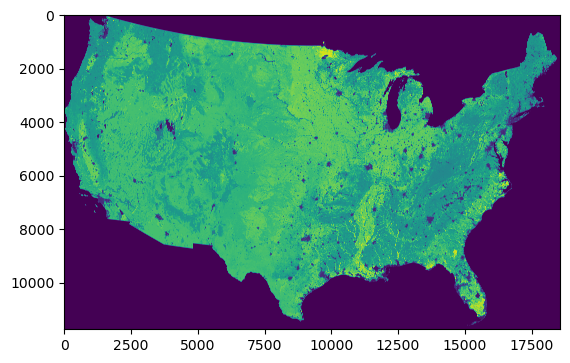

In [70]:
with rasterio.open("./data/CONUS_Landcover_B1/CONUS_B1_y2030.tif") as src:
  out_meta = src.meta
  
  band1 = src.read(1) # as a numpy array
  
  # create new array where all values in the band of 2 becomes 1 and everything else becomes 0
  # in order to create an array that shows where developed land is located
  recalc = numpy.where(band1 == 2, 1, 0)
  
with rasterio.open("/mnt/d/output.tif", 'w', **out_meta) as dataset:
  dataset.write(recalc, 1)
  

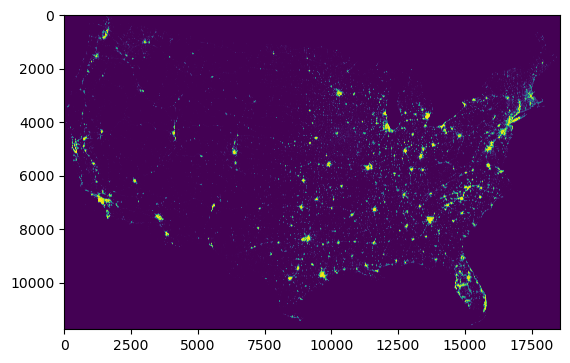

In [104]:
# open the raster and lock it in the filesystem while working on it
raster = rasterio.open("./data/CONUS_Landcover_B1/CONUS_B1_y2030.tif")

e = [2]



# create new array where all values in the band of 2 becomes 1 and everything else becomes 0
# in order to create an array that shows where developed land is located
band1 = raster.read(1)
recalc = numpy.where(numpy.isin(band1, e), 1, 0)

pyplot.imshow(recalc)
pyplot.show()

# export the extracted band pixel values
# with the extracted band as black pixels and the rest as transparent white pixels
out_profile = raster.profile.copy()
out_profile.update(nodata=0)
with rasterio.open("/mnt/d/output.tif", "w", **out_profile) as dest:
   dest.write(recalc, 1)
   dest.write_colormap(1, { 1: (255, 0, 0, 255) })

# remove the lock on the raster
raster.close()